[[1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1
  1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1
  2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2
  2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1]
 [1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1
  2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2
  2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2
  1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1]]


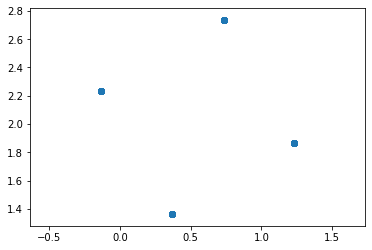

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#creating a square
xvals = [1,1,2,2,1]
yvals = [1,2,2,1,1]

xygrid= np.column_stack([[xvals, yvals] for x in xvals for y in yvals])
print(xygrid)
plt.axis("equal")
theta = np.pi / 6 # 30 degree clockwise rotation
A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
#A = np.column_stack([[2, 1], 
                     #[-1, 1]])
uvgrid = A @ xygrid
plt.scatter(uvgrid[0], uvgrid[1])

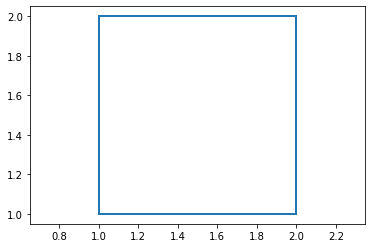

In [67]:
plt.axis("equal")
plt.plot(xygrid[0], xygrid[1])


In [54]:
def stepwise_transform(A, grid, num_steps):
    """
        Returns a list of transformed grids, stepping from the given grid to the grid A @ grid.
    """
    # create empty array of the right size
    transgrid = np.zeros((num_steps + 1, ) + np.shape(grid))
    # compute intermediate transforms
    for i in range(num_steps + 1):
        intermediate = np.eye(2) + i / num_steps * (A - np.eye(2))
        # apply intermediate matrix transformation
        transgrid[i] = intermediate @ grid
    return transgrid


print(stepwise_transform(A, xygrid, 50))
print(np.shape(xygrid))

[[[1.   1.   2.   ... 2.   2.   1.  ]
  [1.   2.   2.   ... 2.   1.   1.  ]]

 [[1.   1.   2.   ... 2.   2.   1.  ]
  [0.98 1.96 1.96 ... 1.96 0.98 0.98]]

 [[1.   1.   2.   ... 2.   2.   1.  ]
  [0.96 1.92 1.92 ... 1.92 0.96 0.96]]

 ...

 [[1.   1.   2.   ... 2.   2.   1.  ]
  [0.04 0.08 0.08 ... 0.08 0.04 0.04]]

 [[1.   1.   2.   ... 2.   2.   1.  ]
  [0.02 0.04 0.04 ... 0.04 0.02 0.02]]

 [[1.   1.   2.   ... 2.   2.   1.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]]
(2, 125)


In [73]:
def animate_transform(A, grid=None, num_steps=50, repeat=False):
    """
        Animates the effect a transform has on a given grid. If no grid is given, one will be generated.
        
        You can expect a small delay while the function generates the animation.
    """
    if grid is None:
        # Create a grid of points in x-y space 
        xvals = [1,1,2,2,1]
        yvals = [1,2,2,1,1]
        grid= np.column_stack([[xvals, yvals] for x in xvals for y in yvals])
        
    intermediate_transforms = stepwise_transform(A, grid, num_steps)
    fig = plt.figure(figsize=(6, 6))
    
    xmin = min(min(grid[0]), min(intermediate_transforms[-1][0]))
    xmax = max(max(grid[0]), max(intermediate_transforms[-1][0]))
    ymin = min(min(grid[1]), min(intermediate_transforms[-1][1]))
    ymax = max(max(grid[1]), max(intermediate_transforms[-1][1]))

    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    scatter = ax.scatter([], [], c="b")
    # Prevent `%matplotlib inline` from displaying the above scatter plot.
    plt.close()

    def update(i):
        """Draws the ith intermediate transform"""
        scatter.plot(intermediate_transforms[i].T)
        return scatter,

    return animation.FuncAnimation(fig, update, interval=50, frames=num_steps, blit=True, repeat=repeat)

In [74]:
#A = np.column_stack([[1, 0], [0, 0]])
theta = np.pi / 6 # 30 degree clockwise rotation
A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
anim = animate_transform(A, repeat=True)
anim.save('projection.mp4')
anim

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-73-7004a24da14b>", line 28, in update
    scatter.plot(intermediate_transforms[i].T)
AttributeError: 'list' object has no attribute 'plot'


AttributeError: 'list' object has no attribute 'plot'

In [62]:
from matplotlib import animation, rc
rc('animation', html='html5')